# **IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint, uniform

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **IMPORT DATA, TEST/TRAIN SPLIT, SCALE**

In [3]:
features = pd.read_csv("../data/paris_lille/geometric_features.csv")

X = features.drop(['class'], axis=1)
y = features[['class']].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y)

# **BASELINE GRADIENT BOOSTING**

In [4]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.900     0.562     0.692        16
           Bench      0.000     0.000     0.000         3
    Bicycle Rack      1.000     1.000     1.000         4
Bicycle Terminal      1.000     1.000     1.000         6
         Bollard      0.947     0.986     0.966        73
        Building      1.000     0.857     0.923        14
           Chair      1.000     1.000     1.000         2
Distribution Box      0.917     1.000     0.957        11
      Floor Lamp      0.968     1.000     0.984        30
          Island      0.000     0.000     0.000         1
Lighting Console      0.788     0.976     0.872        42
        Low Wall      0.933     1.000     0.966        14
           Meter      0.000     0.000     0.000         2
      Mobile Car      0.750     0.600     0.667         5
  Mobile Scooter      0.000     0.000     0.000         0
      Mobile Van      1.000     1.000     1.000         1
         Natu

In [16]:
gb_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# **HYPERPARAMETER TUNING PART I**

In [33]:
model = GradientBoostingClassifier()

params_grid = {
    "n_estimators" : randint(5,500),
    "max_depth" : randint(1,10),
    "learning_rate": uniform(0.01, 100)
}

In [34]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
random_search = RandomizedSearchCV(estimator=model, n_jobs=-1, cv=cv, param_distributions=params_grid, scoring='f1_micro')
search_results = random_search.fit(X_train, y_train)

In [35]:
search_results.best_estimator_

GradientBoostingClassifier(learning_rate=15.1889580485733, max_depth=8,
                           n_estimators=18)

In [36]:
best_model = search_results.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.333     0.600     0.429        10
           Bench      0.000     0.000     0.000         1
    Bicycle Rack      0.250     0.143     0.182         7
Bicycle Terminal      1.000     1.000     1.000         5
         Bollard      0.970     0.915     0.942        71
        Building      1.000     0.643     0.783        14
           Chair      1.000     1.000     1.000         4
Distribution Box      0.545     0.750     0.632         8
      Floor Lamp      1.000     0.875     0.933        32
          Island      0.000     0.000     0.000         4
Lighting Console      0.906     0.960     0.932        50
        Low Wall      1.000     0.889     0.941        18
         Mailbox      0.000     0.000     0.000         1
           Meter      0.333     1.000     0.500         1
      Mobile Car      0.400     0.400     0.400         5
      Mobile Van      1.000     1.000     1.000         2
         Natu

# **HYPERPARAMETER TUNING PART II**

In [27]:
model = GradientBoostingClassifier()

n_estimators = range(0,100,10)
max_depth = range(1,5)
learning_rate = np.arange(.1,2.5,.1) 

params_grid = {
    "n_estimators" : n_estimators, 
    "max_depth" : max_depth,
    "learning_rate": learning_rate
}

In [28]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=cv, scoring='f1_micro')
search_results = grid_search.fit(X_train, y_train)

In [29]:
search_results.best_estimator_

GradientBoostingClassifier(n_estimators=90)

In [31]:
best_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 90,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [30]:
best_model = search_results.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.833     0.625     0.714        16
           Bench      0.000     0.000     0.000         3
    Bicycle Rack      1.000     1.000     1.000         4
Bicycle Terminal      1.000     1.000     1.000         6
         Bollard      0.948     1.000     0.973        73
        Building      1.000     0.857     0.923        14
           Chair      1.000     1.000     1.000         2
Distribution Box      0.917     1.000     0.957        11
      Floor Lamp      1.000     1.000     1.000        30
          Island      0.000     0.000     0.000         1
Lighting Console      0.788     0.976     0.872        42
        Low Wall      0.933     1.000     0.966        14
           Meter      0.000     0.000     0.000         2
      Mobile Car      0.750     0.600     0.667         5
  Mobile Scooter      0.000     0.000     0.000         0
      Mobile Van      1.000     1.000     1.000         1
         Natu

# **CONFUSION MATRIX**

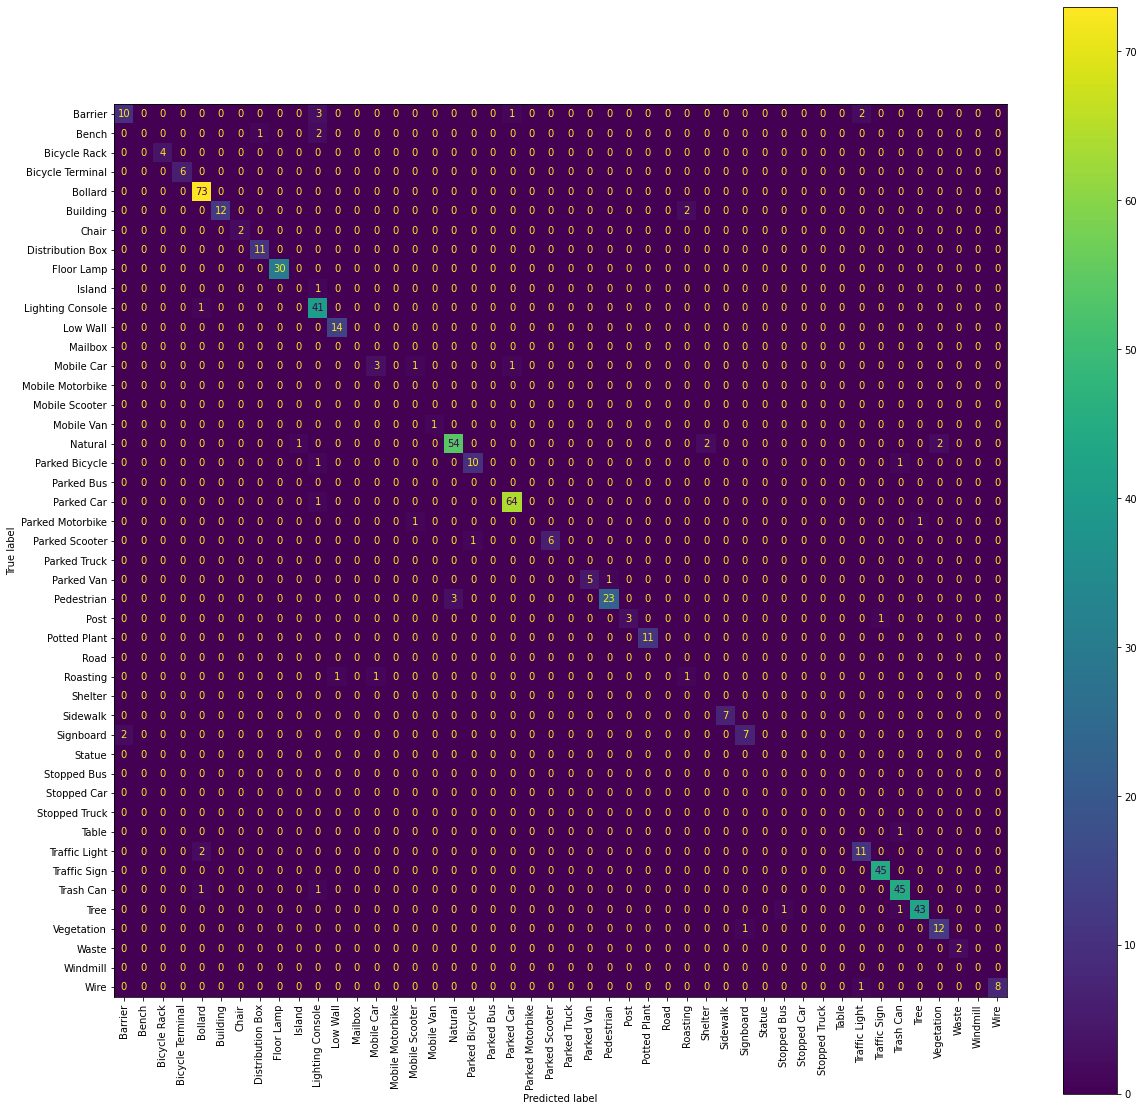

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cmd.plot(ax=ax, xticks_rotation='vertical');

plt.savefig('confusionmatrix_gradientboosting.png', dpi=600)

# **FEATURE IMPORTANCE**

In [33]:
importance = best_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01158
Feature: 1, Score: 0.00609
Feature: 2, Score: 0.03374
Feature: 3, Score: 0.01817
Feature: 4, Score: 0.30462
Feature: 5, Score: 0.03930
Feature: 6, Score: 0.00970
Feature: 7, Score: 0.13699
Feature: 8, Score: 0.43981


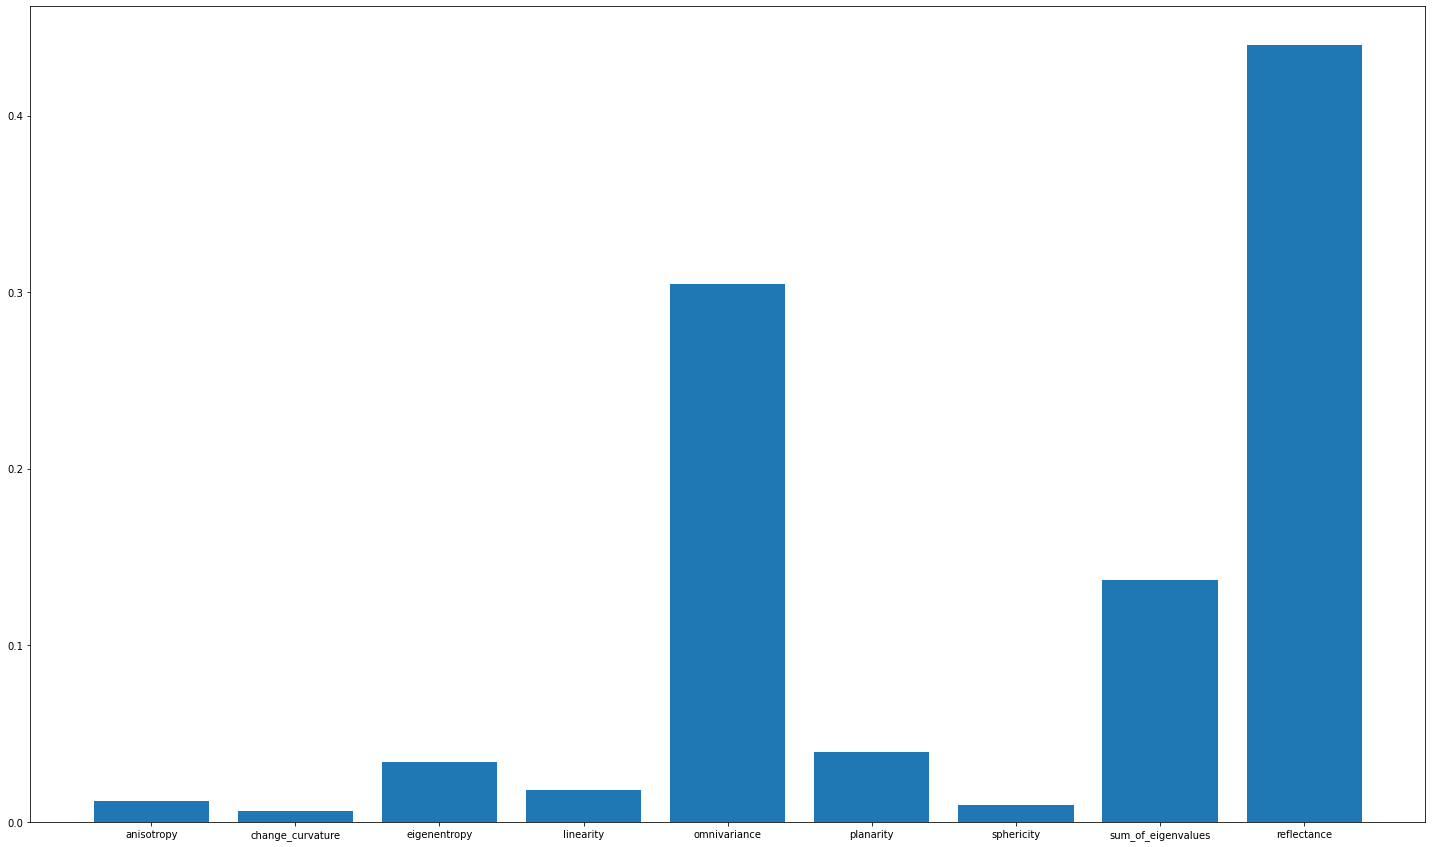

In [34]:
plt.figure(figsize=(25,15))
plt.bar( range(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.xticks(range(len(best_model.feature_importances_)), X.columns)
plt.savefig('featureimportance_gradientboosting.png', dpi=600)
plt.show()